In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

# All the imports in one place, make sure to run this codeblock first!

In [45]:
# uploaded = files.upload()
# Used in Google Collab to upload the csv files.

customer_data4 = pd.read_csv('customerdata4.csv')
wholesale_customer_data = pd.read_csv('Wholesale customers data.csv')

# Takes the csv files and stores the information in 2 new variables so that we can use them later.

Saving customerdata4.csv to customerdata4 (2).csv
Saving Wholesale customers data.csv to Wholesale customers data (2).csv


# T1. k-Means Clustering:
## Exploring the data:

In [ ]:
customer_data4.head()

# Takes a peek at the first 5 rows in the dataset, so that we can get an overview of the various Column names aswell as the type of data in the dataset.
# We can see that this dataset contains nominal data in the form of gender information aswell as quantitative datatypes

,CustomerID,Gender,Age,Annual Income (10kkr),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data4.describe().round(2)
# Motivation for round(2), only std has numbers below that, and stds below 0.00 does not provide more information relative to numbers bloat.

,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


## Box Plots:

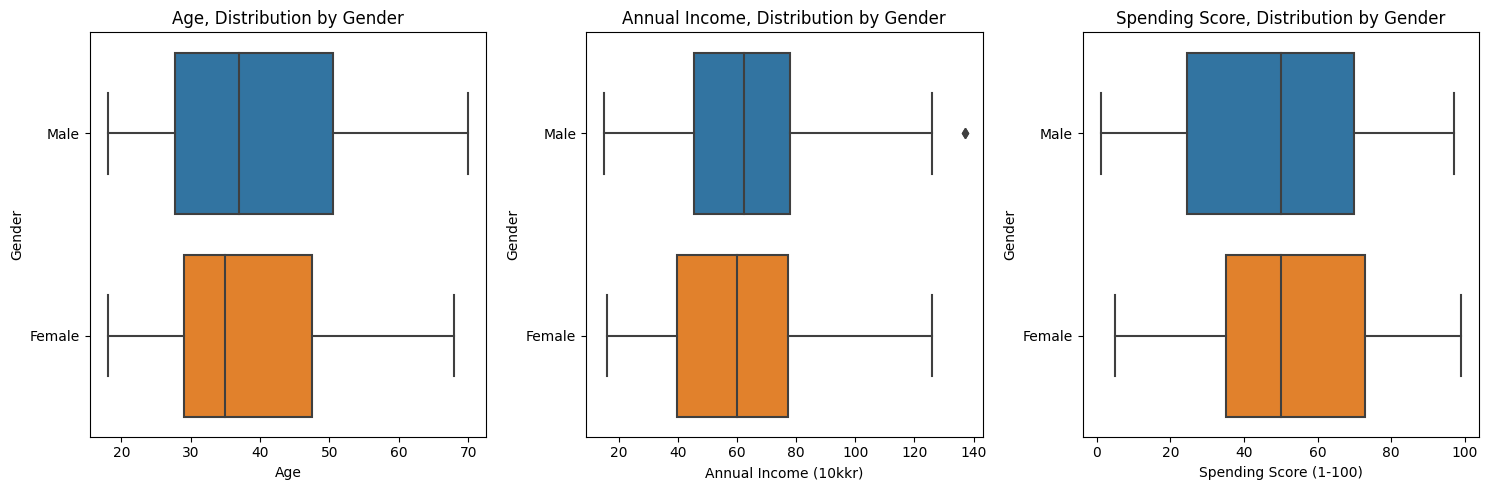

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Age', y='Gender', data=customer_data4)
plt.title('Age, Distribution by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Annual Income (10kkr)', y='Gender', data=customer_data4)
plt.title('Annual Income, Distribution by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Spending Score (1-100)', y='Gender', data=customer_data4)
plt.title('Spending Score, Distribution by Gender')

plt.tight_layout()

plt.show()

# Gender/Age - Men are older and shows more variance in age(older/younger).
# Gender/Income - Men have slightly higher income and womens wealth is distrubted more unevenly, Q1-Q2 contains a larger amount of women.
# Gender/Score - Men on average have more variance, trending to a lower score than women, and women have a small trend that some women in Q2-Q3 have a higher spending score.

# We don't have the data available, but since men have a higher average age in general which could explain the higher annual income.

## Kmeans Age & Spending Score

In [ ]:
df1 = customer_data4[['Age', 'Spending Score (1-100)']]

# Stores the information under the Age & Spending Score columns in a new variable

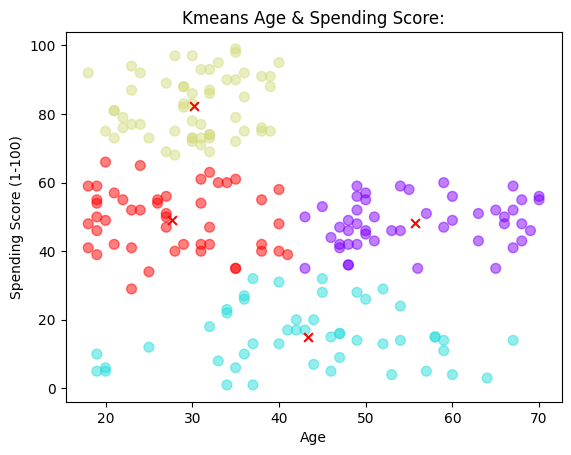

In [ ]:
k = 4
kmeans_data = KMeans(n_clusters = k, n_init = 10).fit(df1)

centroids = kmeans_data.cluster_centers_

cmap = 'rainbow'

plt.scatter(df1['Age'], df1['Spending Score (1-100)'], c=kmeans_data.labels_.astype(float), cmap=cmap, s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40,marker='x')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Kmeans Age & Spending Score:')
plt.show()

# Younger people contains the group that has a higher spending score, which likely mean that they are more brand loyal rather than low-price dependent older generations.
# From our limited experience the Elbow method seems to suggest a k = 4, but a k of 5 could also be considered.

## Elbow method, Age & Spending Score:

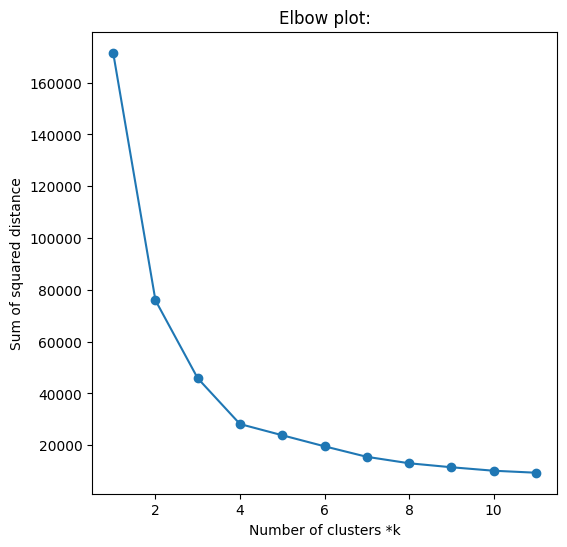

In [ ]:
sse1 = []

k_list = list(range(1, 12))

for k in k_list:
  km_model = KMeans(n_clusters = k, n_init = 10)
  km_model.fit(df1)
  sse1.append(km_model.inertia_)

plt.figure(figsize = (6, 6))
plt.plot(k_list, sse1, '-o')
plt.xlabel('Number of clusters *k')
plt.ylabel('Sum of squared distance')
plt.title('Elbow plot:')
plt.show()

# The elbow method also seems to level out at around 4

## Kmeans Annual Income & Spending Score

In [ ]:
df2 = customer_data4[['Annual Income (10kkr)', 'Spending Score (1-100)']]

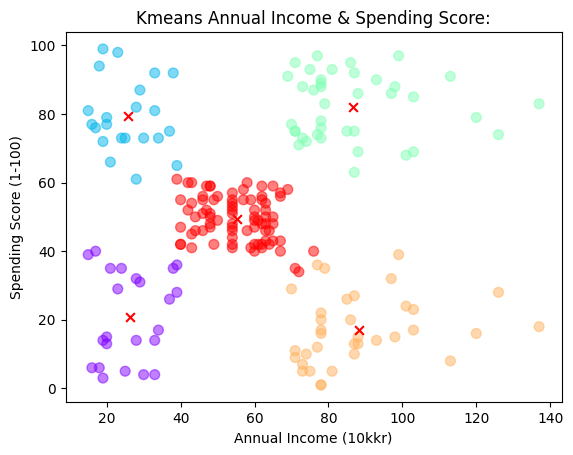

In [ ]:
k = 5
kmeans_data = KMeans(n_clusters = k, n_init = 10).fit(df2)

centroids = kmeans_data.cluster_centers_

cmap = 'rainbow'

plt.scatter(df2['Annual Income (10kkr)'], df2['Spending Score (1-100)'], c=kmeans_data.labels_.astype(float), cmap=cmap, s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40,marker='x')
plt.xlabel('Annual Income (10kkr)')
plt.ylabel('Spending Score (1-100)')
plt.title('Kmeans Annual Income & Spending Score:')
plt.show()

#k produces five very defined clusters, people with low or high annual income show more variance in their spending score than the people that have an average income.

## Elbow method, Annual Income & Spending Score:

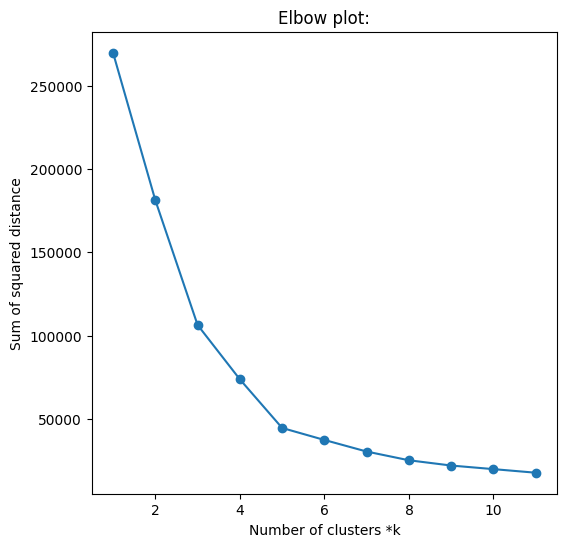

In [ ]:
sse2 = []

k_list = list(range(1, 12))

for k in k_list:
  km_model = KMeans(n_clusters = k, n_init = 10)
  km_model.fit(df2)
  sse2.append(km_model.inertia_)

plt.figure(figsize = (6, 6))
plt.plot(k_list, sse2, '-o')
plt.xlabel('Number of clusters *k')
plt.ylabel('Sum of squared distance')
plt.title('Elbow plot:')
plt.show()

#The elbow method agrees with the codes judgement on the amount of k

# T2. Agglomerative Clustering
## Exploring the data:

In [46]:
wholesale_customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [47]:
wholesale_customer_data.describe().round(6)
# Motivation for round(6) is that the currency is set in miljons, you don't need to see below 0.1 of a currency.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Exploratory Analysis

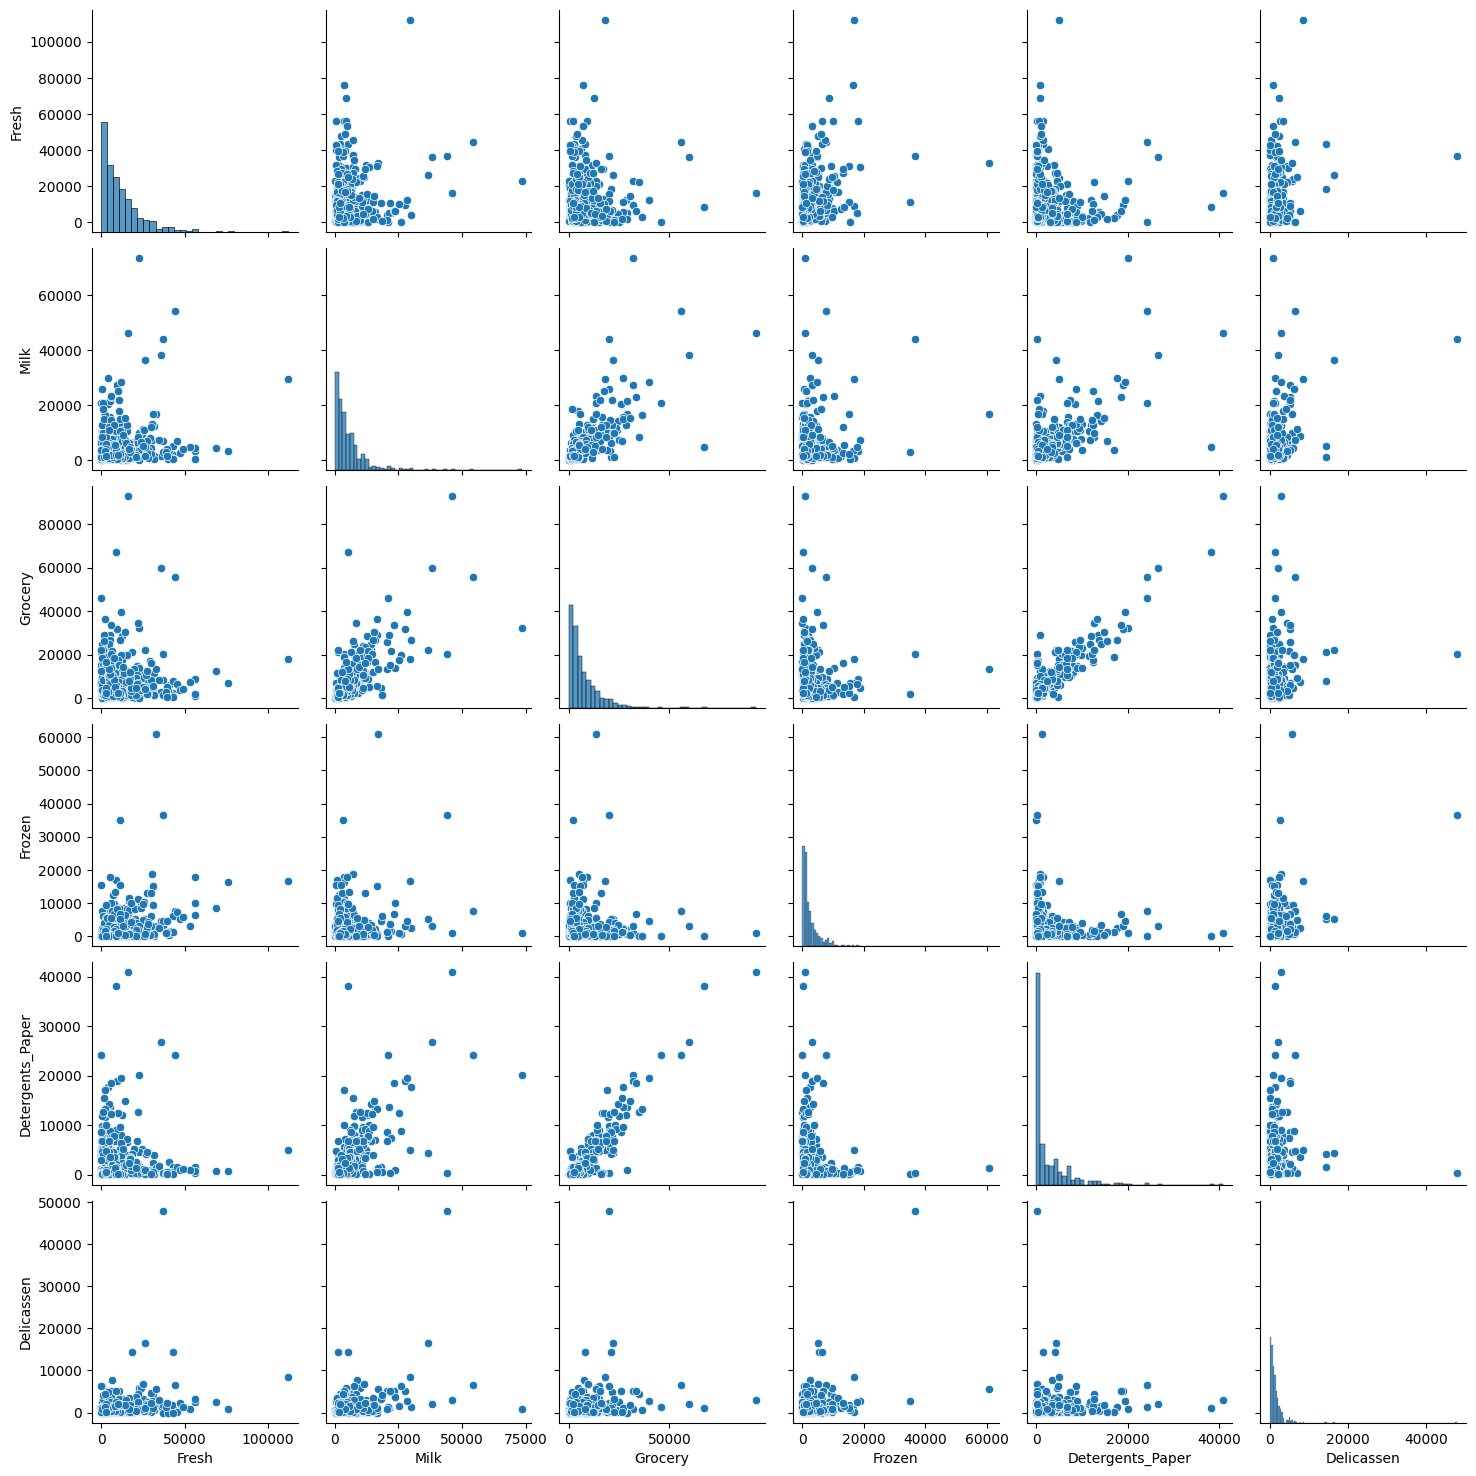

In [48]:
sns.pairplot(data = wholesale_customer_data, vars = ['Fresh','Milk' , 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
plt.show()
# Pairplots using Seaborn to look for 2 columns suitable for clustering.

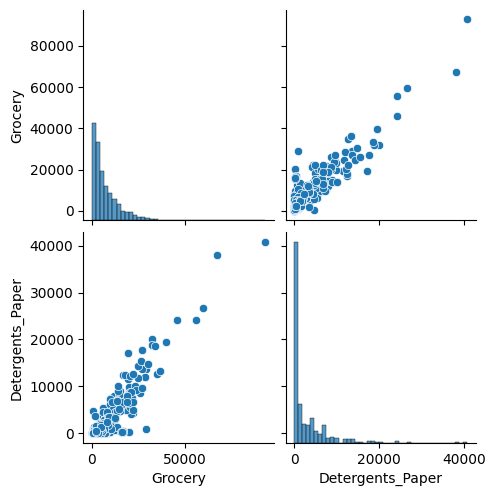

In [49]:
sns.pairplot(data = wholesale_customer_data, vars = ['Grocery','Detergents_Paper'])
plt.show()

# Toilet papers and food is interesting to us, which is one explanation why we chose these 2 columns.
# Another explanation to why it interested us is the fact that most of the datapoints seem to follow the imaginary "line"
# stretching from origo, which would indicate a high correlation.

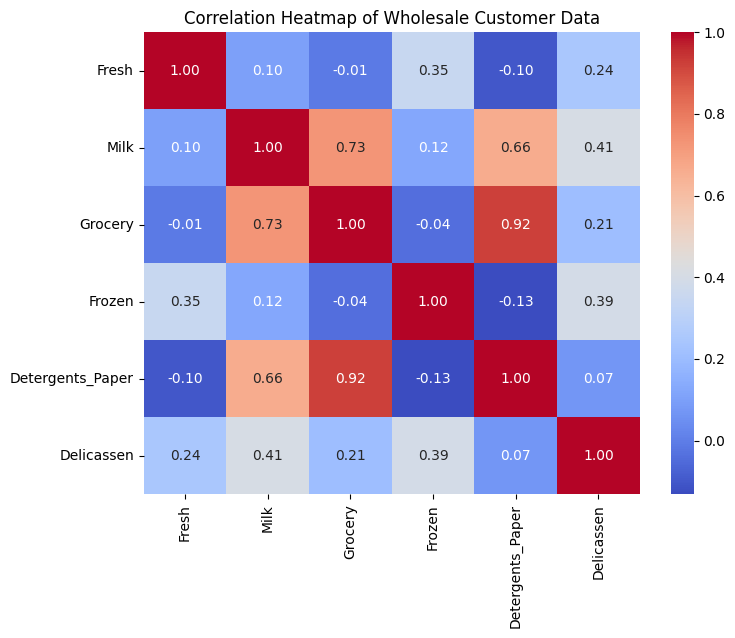

In [ ]:
selected_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
selected_data = wholesale_customer_data[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wholesale Customer Data')
plt.show()

## Dendrogram:

In [52]:
dendro_data = wholesale_customer_data[['Grocery', 'Detergents_Paper']]

dendro_data.shape

# Storing the data from our chosen columns, Grocery & Detergents_Paper into a new variable
# to be used in the dendrogram
# .shape gives us information about the number of rows and columns

(440, 2)

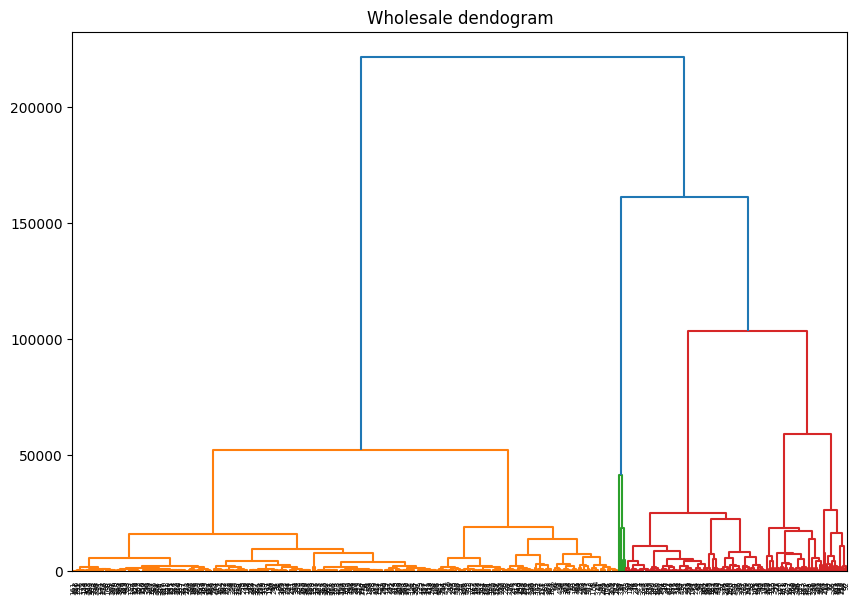

In [50]:
plt.figure(figsize=(10,7))
plt.title("Wholesale dendogram")
dend = shc.dendrogram(shc.linkage(dendro_data, method='ward'))
plt.show()

# Shows a dendrogram based on Grocery & Detergents_Paper
# If we decide to cut it along the 100 000 m.u line, we get 4 clusters
# if we decide to cut it betweeen 100 000 and 150 000 we get 3 clusters

## Agglomerative Clustering:

In [51]:
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
cluster.fit_predict(dendro_data)

# Performs agglomerative clustering on the "dendro_data" dataset we created earlier for the dendrogram
# using scikit-learns AgglomerativeClustering method with 4 as a chosen number of clusters.
# After this code has been run, cluster labels get assigned to clusters.labels_ which is used in the next code block.

array([1, 3, 1, 1, 1, 1, 1, 3, 1, 0, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1,
       1, 0, 3, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 0,
       3, 0, 0, 2, 3, 0, 1, 1, 1, 3, 1, 1, 0, 3, 1, 1, 1, 2, 1, 3, 1, 0,
       1, 3, 1, 1, 1, 0, 1, 1, 3, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 3, 1, 3, 3, 3, 1, 1, 0, 1, 0, 3, 1, 1, 1, 3, 0, 1, 0, 1, 3,
       1, 1, 1, 1, 1, 0, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 0, 1, 1, 1, 3,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 3, 3, 0, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1,

Text(0.5, 1.0, 'Agglomerative Clustering, YAY')

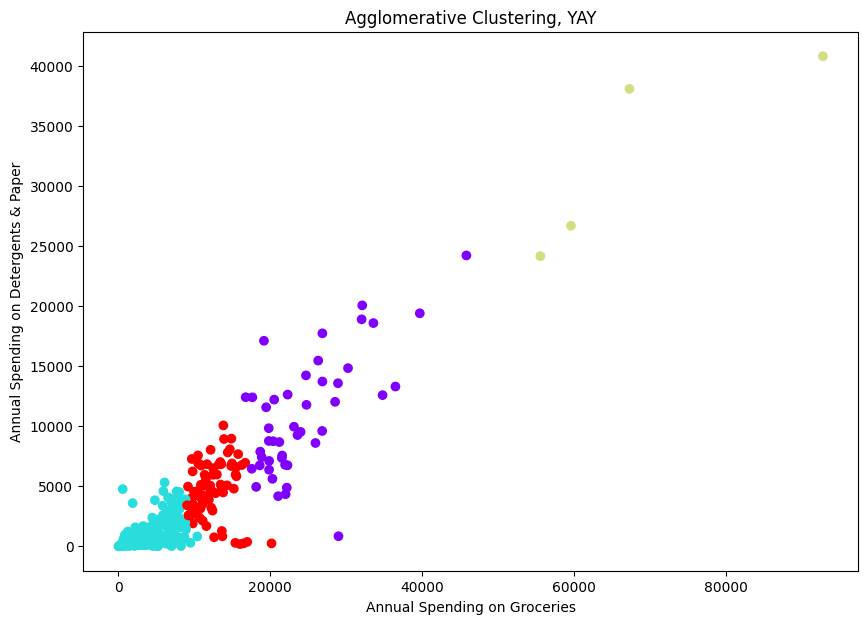

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(dendro_data['Grocery'], dendro_data['Detergents_Paper'], c=cluster.labels_, cmap="rainbow")
plt.xlabel("Annual Spending on Groceries")
plt.ylabel("Annual Spending on Detergents & Paper")
plt.title ("Agglomerative Clustering, YAY")

# Here we are using the clustering data from the codeblock earlier to
# to show us a Scatterplot of the data.

# People that spends alot of money on groceries also spends alot of money on Detergents & Paper.